<a href="https://colab.research.google.com/github/JiayiZhang-Evelynn/MLDL_hw2/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Programming

The following notebook contains skeleton-code for answering problems 2 and 3 of homework assignment 2. Please read through each cell carefully to understand what is expected to be implemented. For your final submission, please try to clean up any intermediate outputs used for debugging.

### Imports

You should be able to complete the entire assignment using only the following imports. Please consult the course staff if you are unsure about whether additional packages may be used.

In [33]:
## Import Packages
import random
import numpy as np
import matplotlib.pyplot as plt

## Question 2


Below we provide an AutoGrad class named `Value`. The basic idea is to store the existing computational map during the creation of each `Value`, and calculate the gradient using backpropagation when one of the `Value` calls `backward()` method.

The `backward()` function will arange the computational graph and backpropagate the gradients. All you need to do is to implement all the operations with its corresponding `_backward` function. We have provided the `__add__` function (sum of two nodes) as an example to help get you started.

This notebook is designed in a Object Oriented way, if you are not farmiliar with the Object Oriented Programming in Python, you can refer to:

(1) https://realpython.com/python3-object-oriented-programming/

(2) https://docs.python.org/3/tutorial/classes.html


In [3]:
class Value:

    """
    Basic unit of storing a single scalar value and its gradient
    """

    def __init__(self, data, _children=()):
        """

        """
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None

    def __add__(self, other):
        """
        Example implementation of a single class operation (addition)

        Args:
            other (Any): Node to add with the class

        Returns:
            out (callable): Function to referesh the gradient
        """
        #Firstly, convert some default value type in python to Value
        #Then do operations with two or more Value object
        other = other if isinstance(other, Value) else Value(other)

        #Secondly, create a new Value object which is the result of the operation
        out = Value(self.data + other.data, (self, other))

        #Thirdly, create a _backward function for the output object to refresh
        # the gradient of its _childrens,
        #Then assign this _backward function to the output object.
        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        """
        Multiplication operation (e.g. Value(3) * Value(2) = Value(6))
        """
        #TODO implement multiplication operation
########
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other))

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

###########






        return NotImplementedError

    def __pow__(self, other):
        """
        Power operation (e.g Value(3) ** 2 = Value(9))
        """
        #TODO implement power operation, we don't need to convert the exponent to Value
        assert isinstance(other, (int, float))
##############
        out = Value(self.data ** other, (self,))

        def _backward():
            self.grad += out.grad * (other * (self.data ** (other - 1)))

        out._backward = _backward
        return out

###################
       # return NotImplementedError

    def relu(self):
        """
        ReLU activation function applied to the current Value
        """
        #TODO implement the relu activation function for the value itself.
######################

        out = Value(self.data if self.data > 0 else 0, (self,))

        def _backward():
            self.grad += out.grad * (1.0 if self.data > 0 else 0.0)
        out._backward = _backward

        return out

####################
        #return NotImplementedError


    def exp(self):
        """
        Exponentiate the current Value (e.g. e ^ Value(0) = Value(1))
        """
        #TODO implement the exponential function for and treat the value as exponent.
        #The base is natural e, you can use numpy to calculate the value of the exponential.
#######################
        out = Value(np.exp(self.data), (self,))

        def _backward():
            self.grad += out.grad * out.data  # Since d/dx(e^x) = e^x

        out._backward = _backward
        return out

###################
        #return NotImplementedError

    def log(self):
        """
        Take the natural logarithm (base e) of the current Value
        """
        #TODO implement the logarithm function for and treat the value as exponent.
        #The bottom number should be e, you can use numpy to calculate the value of the logarithm.
################

        out = Value(np.log(self.data), (self,))

        def _backward():
            self.grad += out.grad * (1 / self.data)  # Since d/dx(ln(x)) = 1/x

        out._backward = _backward
        return out


#################
      #  return NotImplementedError

    def backward(self):
        """
        Run backpropagation from the current Value
        """
        #This function is called when you start backpropagation from this Value

        #The gradient of this value is initialized to 1 for you.
        self.grad = 1

        #You need to find a right topological order all of the children in the graph.
        #As for topology sort, you can refer to http://www.cs.cornell.edu/courses/cs312/2004fa/lectures/lecture15.htm

        topo = []
        #TODO find the right list of Value to be traversed

        #############
        '''
        Hint: you can recursively visit all non-visited node from the node calling backward.
        add one node to the head of the list after all of its children node are visited
        '''

        #go one variable at a time and apply the chain rule to get its gradient

        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)


        for v in reversed(topo):
            v._backward()

       # for v in topo:
          #  v._backward()

    # We handled the negation and reverse operations for you
    def __neg__(self): # -self
        """
        Negate the current Value
        """
        return self * -1

    def __radd__(self, other): #other + self
        """
        Reverse addition operation (ordering matters in Python)
        """
        return self + other

    def __sub__(self, other): # self - other
        """
        Subtraction operation
        """
        return self + (-other)

    def __rsub__(self, other): # other - self
        """
        Reverse subtraction operation
        """
        return other + (-self)

    def __rmul__(self, other): # other * self
        """
        Reverse multiplication operation
        """
        return self * other

    def __truediv__(self, other): # self / other
        """
        Division operation
        """
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        """
        Reverse diction operation
        """
        return other * self**-1

    def __repr__(self):
        """
        Class representation (instead of unfriendly memory address)
        """
        return f"Value(data={self.data}, grad={self.grad})"

Now, we are going to use the simple example in q1.b to get you familar with the usage of this class.

If your implementation is correct, you will get the same values and gradients as your hand-caculated ones.

Be careful! Even you get this test case right, it does not guarantee the correctness of your implementation.

In [4]:
## Initialize Example Values (From Written Assignment)
w1 = Value(0.2)
w2 = Value(0.4)
x1 = Value(-0.4)
x2 = Value(0.5)

#TODO
#Do calculation for the question 1.b, and call backward to start backpropagation.
#Then print out the gradient of w1 w2 x1 x2.

# Define sigmoid function
def sigmoid(x):
    result = Value(1) / (Value(1) + (-x).exp())
    print(f"Sigmoid({x.data}) = {result.data}")
    return result

# Define the function f
def f(x1, x2, w1, w2):
    # Step 1: Calculate w1 * x1
    wx1 = w1 * x1
    print(f"w1 * x1 = {w1.data} * {x1.data} = {wx1.data}")

    # Step 2: Calculate w2 * x2
    wx2 = w2 * x2
    print(f"w2 * x2 = {w2.data} * {x2.data} = {wx2.data}")

    # Step 3: Calculate w1 * x1 + w2 * x2
    wx_sum = wx1 + wx2
    print(f"w1 * x1 + w2 * x2 = {wx1.data} + {wx2.data} = {wx_sum.data}")

    # Step 4: Apply sigmoid function to the sum
    sigmoid_result = sigmoid(wx_sum)

    # Step 5: Calculate 0.5 * (w1^2 + w2^2)
    w1_sq = w1 ** 2
    w2_sq = w2 ** 2
    print(f"w1^2 = {w1.data}^2 = {w1_sq.data}")
    print(f"w2^2 = {w2.data}^2 = {w2_sq.data}")

    regularization = Value(0.5) * (w1_sq + w2_sq)
    print(f"0.5 * (w1^2 + w2^2) = 0.5 * ({w1_sq.data} + {w2_sq.data}) = {regularization.data}")

    # Step 6: Final output
    output = sigmoid_result + regularization
    print(f"Final output: Sigmoid part + Regularization part = {sigmoid_result.data} + {regularization.data} = {output.data}")

    return output


# Perform forward pass with detailed printout
print("Forward Pass:")
output = f(x1, x2, w1, w2)

# Perform backward pass with detailed printout
print("\nBackward Pass:")
output.backward()

# Print gradients after backward pass
print(f"Gradient wrt x1: {x1.grad}")
print(f"Gradient wrt x2: {x2.grad}")
print(f"Gradient wrt w1: {w1.grad}")
print(f"Gradient wrt w2: {w2.grad}")



Forward Pass:
w1 * x1 = 0.2 * -0.4 = -0.08000000000000002
w2 * x2 = 0.4 * 0.5 = 0.2
w1 * x1 + w2 * x2 = -0.08000000000000002 + 0.2 = 0.12
Sigmoid(0.12) = 0.5299640517645717
w1^2 = 0.2^2 = 0.04000000000000001
w2^2 = 0.4^2 = 0.16000000000000003
0.5 * (w1^2 + w2^2) = 0.5 * (0.04000000000000001 + 0.16000000000000003) = 0.10000000000000002
Final output: Sigmoid part + Regularization part = 0.5299640517645717 + 0.10000000000000002 = 0.6299640517645717

Backward Pass:
Gradient wrt x1: 0.04982043112037002
Gradient wrt x2: 0.09964086224074004
Gradient wrt w1: 0.10035913775925998
Gradient wrt w2: 0.524551077800925


## Question 3

### Implementation of the linear layer
You will implement a `LinearLayer` module here.

We provide the initialization of the class `LinearLayer`. You need to implement the forward function -- Return the results - `out` with the shape `[n_samples, n_out_channels]` of a linear layer when the the data `x` shaped `[n_samples, n_in_channels]` is fed into it.


In [5]:
class Module:

    """
    Base Model Module
    """

    def parameters(self):
        """

        """
        return []

    def zero_grad(self):
        """

        """
        for p in self.parameters():
            p.grad = 0

class LinearLayer(Module):

    """
    Linear Layer
    """

    def __init__(self, nin, nout):
        """
        Here we randomly initilize the weights w as 2-dimensional list of Values
        And b as 1-dimensional list of Values with value 0

        You may use this stucture to implement the __call__ function
        """
        self.w = []
        for i in range(nin):
            w_tmp = [Value(random.uniform(-1,1)) for j in range(nout)]
            self.w.append(w_tmp)
        self.b = [Value(0) for i in range(nout)]
        self.nin = nin
        self.nout = nout

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]

        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #TODO implement this function and return the output of a linear layer.
#############
    # Initialize output list
        batch_size = len(x)
        xout = []
        for i in range(batch_size):
            x_row = x[i]
            xout_row = []
            # For each output unit
            for j in range(self.nout):
              # Compute Wx + b for each output unit
                sum_val = Value(0)
                for k in range(self.nin):
                    sum_val += x_row[k] * self.w[k][j]
                sum_val += self.b[j]
                xout_row.append(sum_val)
            xout.append(xout_row)
        return xout


        #return NotImplementedError

    def parameters(self):
        """
        Get the list of parameters in the Linear Layer

        Args:
            None

        Returns:
            params (list): List of parameters in the layer
        """
        return [p for row in self.w for p in row] + [p for p in self.b]

Test your implementation of linear layer, the error should be nearly 0.

In [6]:
## Initialization of Layer with Weights
linear_model_test = LinearLayer(4, 4)
linear_model_test.w = [[Value(data=0.7433570245252463), Value(data=-0.9662164096144394), Value(data=-0.17087204941322653), Value(data=-0.5186656374983067)],
                       [Value(data=-0.1414882837892344), Value(data=-0.5898971049017006), Value(data=-0.3448340220492381), Value(data=0.5278833226346107)],
                       [Value(data=0.3990701306597799), Value(data=-0.3319058654296163), Value(data=-0.784797384411202), Value(data=0.7603317495966846)],
                       [Value(data=-0.5711035064293541), Value(data=-0.0001937643033362857), Value(data=0.12693226232877053), Value(data=-0.36044237239197097)]]
linear_model_test.b = [Value(data=0), Value(data=0), Value(data=0), Value(data=0)]

## Forward Pass
x_test = [[-0.17120438454836173, -0.3736077734087335, -0.48495413054653214, 0.8269206715993096]]
y_hat_test = linear_model_test(x_test)
y_ref = [[Value(data=-0.7401928625441141), Value(data=0.5466095223360173), Value(data=0.6436403600545564), Value(data=-0.7752067527386406)]]

## Error Calculation
predict_error = 0
for i in range(4):
    predict_error += (y_hat_test[0][i] - y_ref[0][i])**2
print(predict_error.data)

0.0


### Implementation of Loss functions

You will implement softmax, cross entropy loss, and accuracy here for further use

In [89]:
def softmax(y_hat):
    """
    Softmax computation

    Args:
        y_hat (2d-list): 2-dimensional list of Values with shape [batch_size, n_class]

    Returns:
        s (2d-list): 2-dimensional list of Values with the same shape as y_hat
    """
    #TODO implement the softmax function and return the output.
    # Implement the softmax function and return the output.
    batch_size = len(y_hat)
    n_class = len(y_hat[0])
    s = []
    for i in range(batch_size):
        # Compute exponentials of all values in y_hat[i]
        exp_vals = [y_hat[i][j].exp() for j in range(n_class)]
        sum_exp = sum(exp_vals)
        # Compute softmax for each class
        softmax_vals = [exp_vals[j] / sum_exp for j in range(n_class)]
        s.append(softmax_vals)
    return s

   # return NotImplementedError

In [8]:
def cross_entropy_loss(y_hat, y):
    """
    Cross-entropy Loss computation

    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]

    Returns:
        loss (Value): Loss value of type Value
    """
    #TODO implement the calculation of cross_entropy_loss between y_hat and y.
    batch_size = len(y_hat)
    loss = Value(0)
    s = softmax(y_hat)  # Convert logits to probabilities
    for i in range(batch_size):
        # y[i] is the index of the true class label for sample i
        correct_class_prob = s[i][y[i]]
        loss += -correct_class_prob.log()
    # Return the average loss over the batch
    return loss / batch_size


    #return NotImplementedError

In [9]:
def accuracy(y_hat, y):
    """
    Accuracy computation

    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]

    Returns:
        acc (float): Accuracy score
    """
    #TODO implement the calculation of accuracy of the predicted y_hat w.r.t y.
    batch_size = len(y_hat)
    n_class = len(y_hat[0])
    correct = 0
    for i in range(batch_size):
        # Extract the predicted values for the i-th sample
        preds = [y_hat[i][j].data for j in range(n_class)]
        # Get the index of the maximum predicted value
        pred_class = preds.index(max(preds))
        # Compare with the ground truth label
        if pred_class == y[i]:
            correct += 1
    # Calculate accuracy as the proportion of correct predictions
    acc = correct / batch_size
    return acc

   #return NotImplementedError

Test the implementation of `softmax()` and `cross_entropy_loss()` as well as the gradient calculation of `Value` class. The errors should be nearly 0.

In [10]:
## Ground Truth + Forward Pass
y_gt = [1]
y_hat_test = linear_model_test(x_test)

## Softmax Calculation
prob_test = softmax(y_hat_test)
prob_ref = [[0.10441739448437284, 0.37811510516540814, 0.4166428991676558, 0.10082460118256342]]
softmax_error = 0
for i in range(4):
    softmax_error += (prob_ref[0][i] - prob_test[0][i])**2
print(softmax_error.data)

## Cross Entropy Loss Calculation
loss_test = cross_entropy_loss(y_hat_test, y_gt)
loss_ref = Value(data=0.9725566186970217)
print((loss_test - loss_ref).data)

## Update Gradient Based on Loss
linear_model_test.zero_grad()
loss_test.backward()
w_gradient_ref = [[-0.017876715758840547, 0.10646942068007896, -0.07133109112844363, -0.01726161379279479],
                  [-0.0390111502584479, 0.23234103087567629, -0.1556610258645873, -0.03766885475264107],
                  [-0.05063764675610328, 0.30158564847453107, -0.2020526949142369, -0.04889530680419089],
                  [0.08634490197366762, -0.5142494748940867, 0.3445306259968013, 0.08337394692361787]]
b_gradient_ref = [0.10441739448437282, -0.6218848948345919, 0.4166428991676557, 0.1008246011825634]

## Compute Error
w_gradient_error = 0
b_gradient_error = 0
for i in range(4):
    b_gradient_error += (linear_model_test.b[i].grad - b_gradient_ref[i]) ** 2
    for j in range(4):
        w_gradient_error += (linear_model_test.w[i][j].grad - w_gradient_ref[i][j]) ** 2
print(w_gradient_error)
print(b_gradient_error)

0.0
0.0
0.0
0.0


Implement the following functions to visualize the ground truth and the decision boundary in the same figure.

In [82]:

def plot_points(X, Y, scale, n, data):
    """
    Plot points in the visualization image
    """
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]

    for i in range(len(X)):
#TODO Assign a color to "data" according to the position and the label of X

        x = X[i][0]
        y = X[i][1]
        label = Y[i]

        # Convert X, Y from coordinates to pixel positions in the n*n image
        ix = int((x + scale) / (2 * scale) * n)  # map x to pixel space
        iy = int((y + scale) / (2 * scale) * n)  # map y to pixel space
        label = int(Y[i])
        if ix >= 0 and ix < n and iy >= 0 and iy < n:
            data[ix, iy] = points_color[label]   # Assign the color to the pixel


    return data


def plot_background(scale, n, model):
    """
    Color the background in the visualization image
    """

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]

    data = np.zeros((n,n,3), dtype='uint8')


            #TODO using the model to predict a class for the input and assign a color to "data" at this position.
    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input = [[Value(x1), Value(x2)]]

            current_pred = model(input)
            pred_class = []
            for k in range(len(current_pred[0])):
                pred_class.append(current_pred[0][k].data)
            pred_label = np.argmax(pred_class)
            data[i][j] = background_color[pred_label]
    return data


def visualization(X, Y, model):
    """
    Decision boundary visualization
    """
    scale = 4.5  # the scale of X axis and Y axis. To say, x is from -scale to +scale
    n = 300      # seperate the image into n*n pixels

    data = plot_background (scale, n, model)
    data = plot_points (X, Y, scale, n, data)

    plt.imshow(data)
    plt.axis('off')
    plt.show()

if you implement the plot function correctly, you will get some image like:

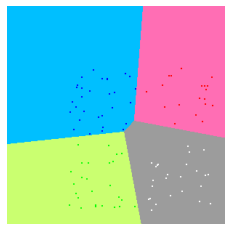


### Implementation of training procedure

With input data `x`, ground_truth `y`, and `model` as parameters, implement the gradient descent method to train your model and plot loss and accuracy vs training iterations

In [ ]:
def train(x,
          y,
          model,
          loss_function=cross_entropy_loss,
          accuracy_function=accuracy,
          max_iteration=500,
          learning_rate=1):
    """
    Args:
       x (2-d list): List of Values with shape: [n_samples, n_channels]
       y (1-d list): List of integers with shape: [n_samples]
       model (Module): Linear model
       loss_function (callable): Loss function to use during training
       accuracy_function (callable): Function used for calculating training accuracy
       max_iteration (int): Number of epochs to train model for
       learning_rate (numeric): Step size of the gradient update
    """
    for i in range(max_iteration):
        #TODO compute y_hat and calculate the loss between y_hat and y as well as
        # the accuracy of y_hat w.r.t y.



        y_hat = model(x)
        loss = loss_function(y_hat, y)
        acc = accuracy_function(y_hat, y)

        #TODO Then You will need to calculate gradient for all parameters, and
        #do gradient descent for all the parameters.
        #The list of parameters can be easily obtained by calling
        #model.parameters() which is implemented above.

        model.zero_grad()
        loss.backward()

        for param in model.parameters():
            param.data -= learning_rate * param.grad


        #Then plot the loss / accuracy vs iterations.
        if i % 20 == 19:
            print("iteration",i,"loss:",loss.data, "accuracy:",acc)
        ## record loss
        if i == 0 :
        # initialize L
            L = loss.data
            A = acc
        else:
            L = np.append(L,loss.data)
            A = np.append(A,acc)

    ## Plot Loss and Accuracy
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.show()


### Train the model

Load the data, format it, instantiate your model and start training!

(100, 2) (100,) [0 1 2 3]
iteration 19 loss: 0.5703256428697191 accuracy: 0.95
iteration 39 loss: 0.4194626471562238 accuracy: 0.96
iteration 59 loss: 0.34866069894440105 accuracy: 0.97
iteration 79 loss: 0.305120817842702 accuracy: 0.98
iteration 99 loss: 0.274781095076881 accuracy: 0.98
iteration 119 loss: 0.2520335986105715 accuracy: 0.99
iteration 139 loss: 0.2341315839878089 accuracy: 0.99
iteration 159 loss: 0.21954731022836949 accuracy: 0.99
iteration 179 loss: 0.20735353113022686 accuracy: 0.99
iteration 199 loss: 0.1969502689809191 accuracy: 0.99
iteration 219 loss: 0.18792976966640232 accuracy: 0.99
iteration 239 loss: 0.1800039095664545 accuracy: 0.99
iteration 259 loss: 0.17296253651631754 accuracy: 0.99
iteration 279 loss: 0.16664827447397776 accuracy: 0.99
iteration 299 loss: 0.1609406136132461 accuracy: 0.99
iteration 319 loss: 0.15574549417161923 accuracy: 1.0
iteration 339 loss: 0.1509882742039844 accuracy: 1.0
iteration 359 loss: 0.14660885450732655 accuracy: 1.0
iter

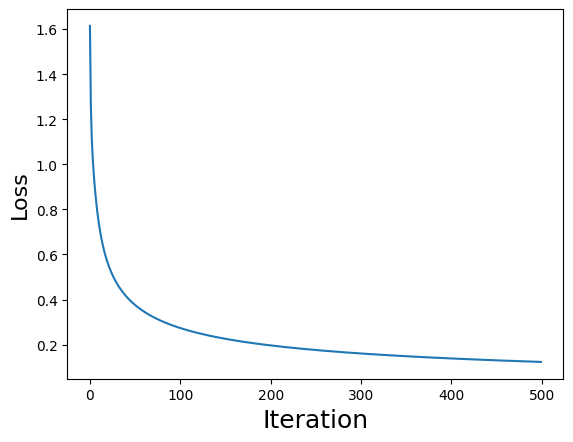

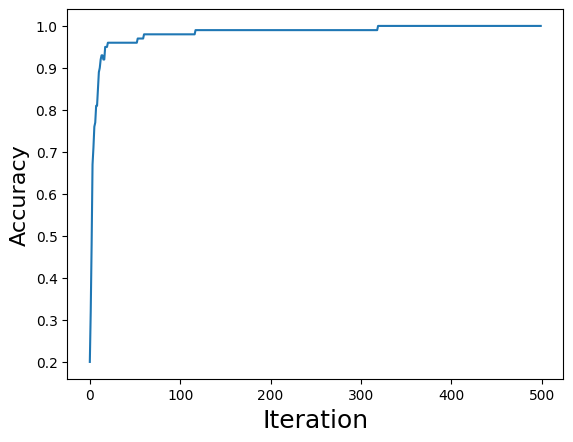

In [66]:
## Load Q3 Dataset

datapath = './Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']
print(X.shape, Y.shape, np.unique(Y))
nin = X.shape[1]
nout = np.max(Y) + 1

## Initialize data using your Value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

## Initialize a Linear Model
linear_model = LinearLayer(nin, nout)

## Train the Model using Your Data
train(x, y, linear_model)

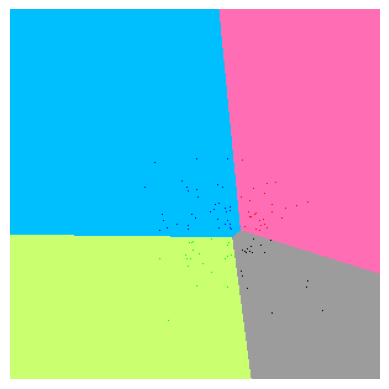

In [71]:
## Visualize learned decision boundaries
visualization(X, Y, linear_model)

## Question 4

### a) Is this dataset linear separable?
load the dataset for this question and train a linear model on this dataset and report the performance

In [74]:
## Load Q4 Dataset
datapath = './Q4_data.npz'
data = np.load(datapath)

## Parse Data and Identify Dimensions
X = data['X']
Y = data['Y']
nin = X.shape[1]
nout = int(np.max(Y)) + 1

## Initialize data using your value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

iteration 19 loss: 0.37673319134715727 accuracy: 0.8
iteration 39 loss: 0.35774870629374955 accuracy: 0.8
iteration 59 loss: 0.35028433789586544 accuracy: 0.825
iteration 79 loss: 0.34602286896544865 accuracy: 0.825
iteration 99 loss: 0.34323026949946067 accuracy: 0.825
iteration 119 loss: 0.34126626959938283 accuracy: 0.825
iteration 139 loss: 0.33982362046516723 accuracy: 0.825
iteration 159 loss: 0.33873228252999316 accuracy: 0.825
iteration 179 loss: 0.33788903891519534 accuracy: 0.85
iteration 199 loss: 0.33722695847445716 accuracy: 0.85
iteration 219 loss: 0.33670047294210054 accuracy: 0.85
iteration 239 loss: 0.3362774098057782 accuracy: 0.85
iteration 259 loss: 0.3359344209999445 accuracy: 0.85
iteration 279 loss: 0.33565419836113547 accuracy: 0.85
iteration 299 loss: 0.3354236922777232 accuracy: 0.85
iteration 319 loss: 0.3352329263153253 accuracy: 0.85
iteration 339 loss: 0.3350741833368165 accuracy: 0.85
iteration 359 loss: 0.33494143261401976 accuracy: 0.85
iteration 379 lo

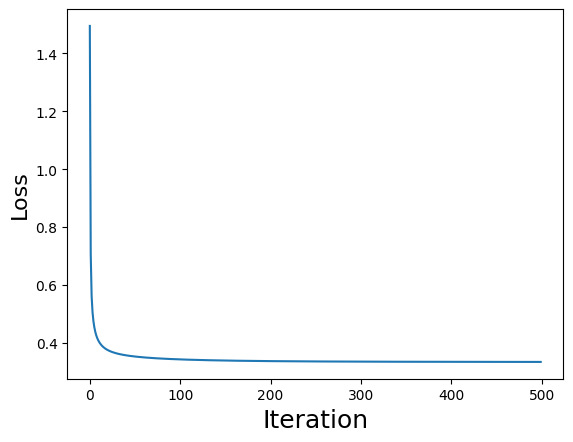

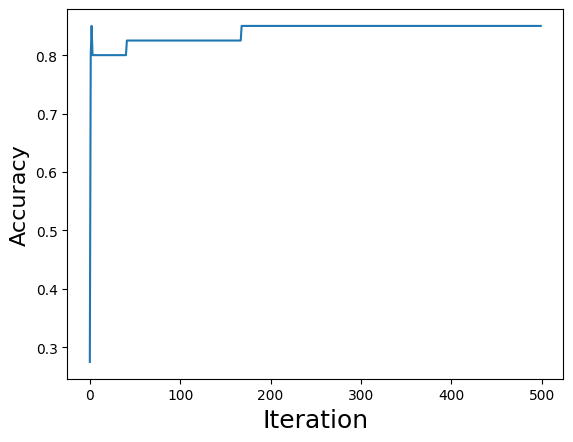

In [75]:
## Initialize Linear Model
linear_model = LinearLayer(nin, nout)

## Train Model
train(x, y, linear_model)

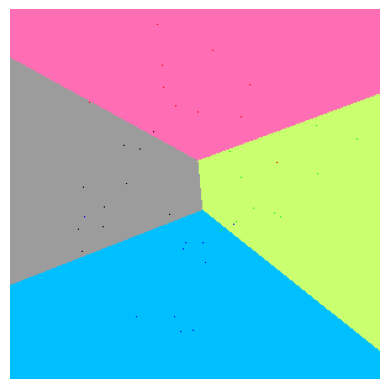

In [83]:
## Visualize Learned Decision Boundary
visualization(X, Y, linear_model)

### b) Implementation of Multi Layer Perceptron (MLP)

Implement a class `MLP` to add arbitrary layers. You will need to implement the forward function to return results `out` with `x` fed into the model.

In [98]:
class MLP(Module):

    """
    Multi Layer Perceptron
    """
    def __init__(self, dimensions):
        """
        Initialize multiple layers here in the list named self.linear_layers
        """
        assert isinstance(dimensions, list)
        assert len(dimensions) > 2
        self.linear_layers = []
        for i in range(len(dimensions) - 1):
            self.linear_layers.append(LinearLayer(dimensions[i], dimensions[i+1]))

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]

        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #TODO Implement this function and return the output of a MLP
# Implement the forward pass through the MLP
        for idx, layer in enumerate(self.linear_layers):
            x = layer(x)  # Forward through the linear layer
            if idx < len(self.linear_layers) - 1:
                # Apply ReLU activation function for hidden layers
                x = [[value.relu() for value in row] for row in x]
            else:
                # For the output layer, no activation or apply softmax if needed
                pass
        return x




        #return NotImplementedError

    def parameters(self):
        """
        Get the parameters of each layer

        Args:
            None

        Returns:
            params (list of Values): Parameters of the MLP
        """
        return [p for layer in self.linear_layers for p in layer.parameters()]

    def zero_grad(self):
        """
        Zero out the gradient of each parameter
        """
        for p in self.parameters():
            p.grad = 0

Train your MLP model and visualize the decision boundary with ground truth points.

iteration 19 loss: 0.32531029112101567 accuracy: 0.875
iteration 39 loss: 0.26730160872327396 accuracy: 0.875
iteration 59 loss: 0.2290253376960386 accuracy: 0.875
iteration 79 loss: 0.21269473013740275 accuracy: 0.9
iteration 99 loss: 0.19809670012961375 accuracy: 0.9
iteration 119 loss: 0.18415343122589303 accuracy: 0.9
iteration 139 loss: 0.16850746145668527 accuracy: 0.9
iteration 159 loss: 0.15531604926518772 accuracy: 0.9
iteration 179 loss: 0.15582194458626453 accuracy: 0.925
iteration 199 loss: 0.14895584767820833 accuracy: 0.925
iteration 219 loss: 0.14277329527236865 accuracy: 0.9
iteration 239 loss: 0.1370692206036288 accuracy: 0.95
iteration 259 loss: 0.12810380982259792 accuracy: 0.95
iteration 279 loss: 0.12639425864649312 accuracy: 0.975
iteration 299 loss: 0.10889591692371847 accuracy: 0.975
iteration 319 loss: 0.09773374191514668 accuracy: 0.975
iteration 339 loss: 0.09976553935821802 accuracy: 0.95
iteration 359 loss: 0.10203029666038804 accuracy: 0.975
iteration 379 

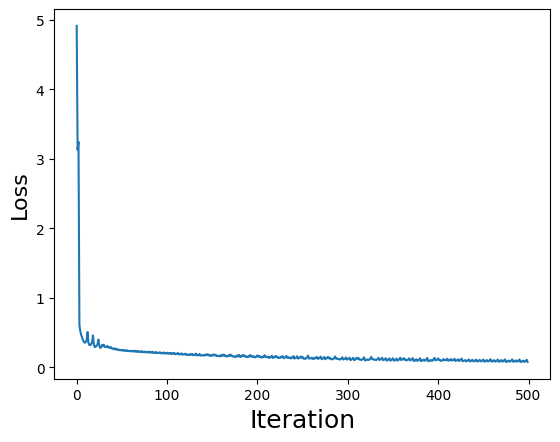

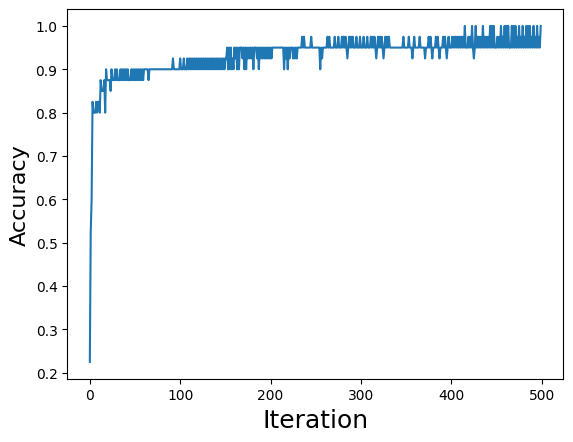

In [100]:
## Initialize MLP with Given Parameters
mlp_model = MLP([nin, 40, nout])

## Train the MLP
train(x, y, mlp_model)

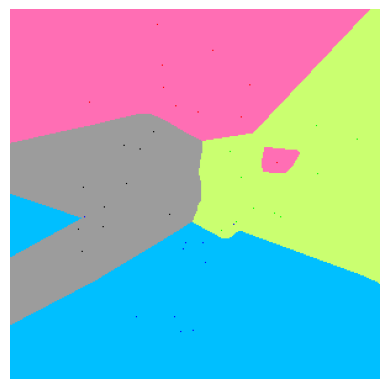

In [101]:
## Visualize Decision Boundaries
visualization(X, Y, mlp_model)

## Acknowledgement

# 新段落

The design of the auto grade structure are based on the work https://github.com/karpathy/micrograd